# Visualization for micro-computed tomography data

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import h5py
import numpy as np
import zipfile
from PIL import Image

## Dataset
https://doi.org/10.18126/6h74-leb4

## Direct Globus Link
https://app.globus.org/file-manager?origin_id=82f1b5c6-6e9b-11e5-ba47-22000b92c6ec&origin_path=/mdf_open/foam_db_v1.1/

# Fetch Images and Other Data
To fetch other files, navigate to the MDF dataset, click the file and then the "Get Link" button.

In [21]:
#single image slices
img_slice_loc = "https://data.materialsdatafacility.org/mdf_open/foam_db_v1.1/microCT_data/VN01/VN01_4X02_S003_BASE/VN01_4X02_S003_BASE_IMG0/VN01_lowmag_pixsz_3p6_recon_16bit_0464.tif"
dest_img = "VN01_lowmag_pixsz_3p6_recon_16bit_0464.tif"
bin_slice_loc = "https://data.materialsdatafacility.org/mdf_open/foam_db_v1.1/microCT_data/VN01/VN01_4X02_S003_BASE/VN01_4X02_S003_BASE_BIN0/vn01_lowmag_pixsz_3p6_binary_0464.tif"
dest_bin = "vn01_lowmag_pixsz_3p6_binary_0464.tif"

#binarized voxel volume
bin_vol_loc = "https://g-29c18.fd635.8443.data.globus.org/impact_database/microCT_data/VN01/VN01_4X02_S001_COMP/VN01_4X02_S001_COMP_BIN0/VN01_4X02_S001_COMP_BIN0_voxel.zip"
dest_vol = "VN01_4X02_S001_COMP_BIN0_voxel.zip"

In [29]:
#set up url readers
r_img_slice = requests.get(img_slice_loc)
r_bin_slice = requests.get(bin_slice_loc)
r_bin_vol = requests.get(bin_vol_loc)

#open the image data
open(dest_img , 'wb+').write(r_img_slice.content)
img_image = Image.open(dest_img)

#open the binarized image data
open(dest_bin , 'wb+').write(r_bin_slice.content)
bin_image = Image.open(dest_bin)

#open the binarized volume data stored in a .zip file
#open(dest_vol , 'wb+').write(r_bin_vol.content)
#bin_vol = zipfile.ZipFile.open(name=dest_vol, mode='r')

with ZipFile(dest_vol) as myzip:
    with myzip.open('eggs.txt') as myfile:
        print(myfile.read())


TypeError: ignored

#Show the Greyscale and binarized Slices
This is similar to the visualization in Fig2a in the manuscript. Note that the raw images slice are stored in a binary blob format that is not directly readable in Python.

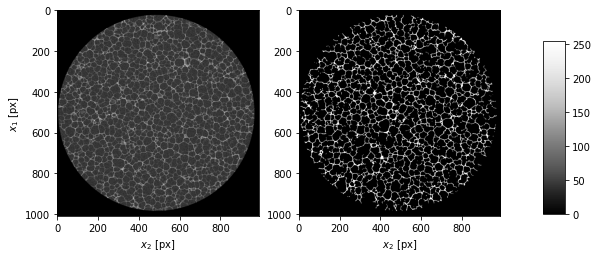

In [18]:
#show both images
plt.subplot(121)
plt.imshow(img_image,cmap='Greys_r',interpolation=None)
plt.ylabel('$x_1$ [px]')
plt.xlabel('$x_2$ [px]')

plt.subplot(122)
plt.imshow(bin_image,cmap='Greys_r',interpolation=None)
#plt.ylabel('$x_1$ [px]')
plt.xlabel('$x_2$ [px]')
plt.subplots_adjust(bottom=0.1, right=1.15, top=1.0)

cax = plt.axes([1.25, 0.2, 0.05, 0.6])
plt.colorbar(cax=cax)

plt.show()

# Load and render a vtk-file of the uCT data

In [ ]:
#get the time, stress, aixial strain and transverse strain components 
#from the complete dataset. Use compressive stress and strain to
#put it in quadrant 1 for plotting
time_all = np.array(dic_data['complete_data']['time'])
eng_stress_c = -1.0*(np.array(dic_data['complete_data']['eng_stress']))
strain_e11_c = -1.0*(np.array(dic_data['complete_data']['E'][0, :]) - 1)
strain_e22 = (np.array(dic_data['complete_data']['E'][1, :]) - 1)

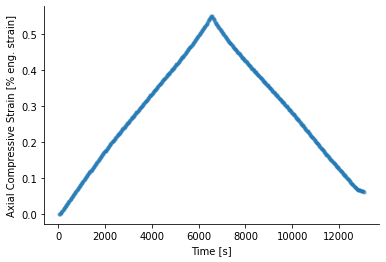

In [ ]:
# plot the axial strain vs time: fig 3a (top) in the manuscript
fig = plt.figure()

ax = plt.scatter(time_all, strain_e11_c, s=10, alpha=0.5)

plt.xlabel("Time [s]")
plt.ylabel("Axial Compressive Strain [% eng. strain]")
sns.despine()
plt.show()



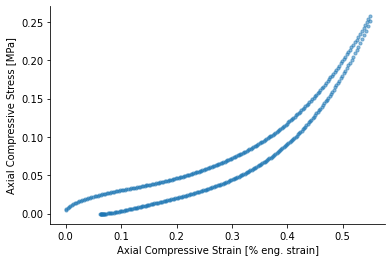

In [ ]:
# plot the axial stress vs strain: fig 3d (left) in the manuscript
fig = plt.figure()

ax = plt.scatter(strain_e11_c, eng_stress_c, s=10, alpha=0.5)

plt.xlabel("Axial Compressive Strain [% eng. strain]")
plt.ylabel("Axial Compressive Stress [MPa]")
sns.despine()
plt.show()


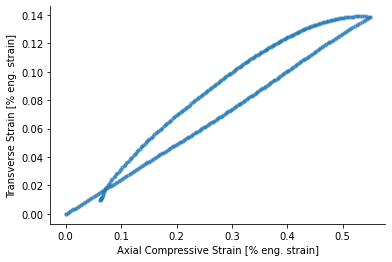

In [ ]:
# plot the axial vs transverse strain: fig 3d (right) in the manuscript
fig = plt.figure()

ax = plt.scatter(strain_e11_c, strain_e22, s=10, alpha=0.5)

plt.xlabel("Axial Compressive Strain [% eng. strain]")
plt.ylabel("Transverse Strain [% eng. strain]")
sns.despine()
plt.show()

#Contour Plots of Displacement at Two Stress Levels

AttributeError: ignored

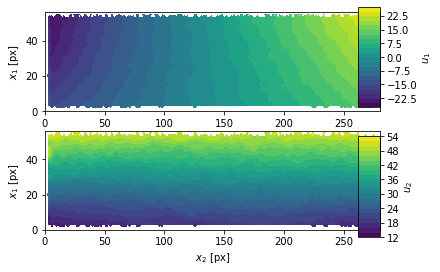

In [ ]:
#Show at close to the start of the plateau - this is similar to fig 3b

#list(dic_data[dic_data['complete_data']['u_total'][30][0]])

disp_field_data_plateau = dic_data[dic_data['complete_data']['u_total'][30][0]]

u1_field_data_plateau = disp_field_data_plateau[0,0]
u2_field_data_plateau = disp_field_data_plateau[1,0]

#show both images

ax1 = plt.subplot(211)
#use rot90 since the matlab data is on an ndgrid-type mesh and plt assume mgrid format
plt.contourf(np.rot90(dic_data[u1_field_data_plateau]),levels=20)
plt.ylabel('$x_1$ [px]')
cax = plt.axes([0.85, 0.55, 0.05, 0.35])
plt.colorbar(cax=cax,label='$u_1$')

ax2 = plt.subplot(212)
plt.contourf(np.rot90(dic_data[u2_field_data_plateau]),levels=20)
plt.ylabel('$x_1$ [px]')
plt.xlabel('$x_2$ [px]')
cax = plt.axes([0.85, 0.1, 0.05, 0.35])
plt.colorbar(cax=cax,label='$u_2$')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

plt.show()


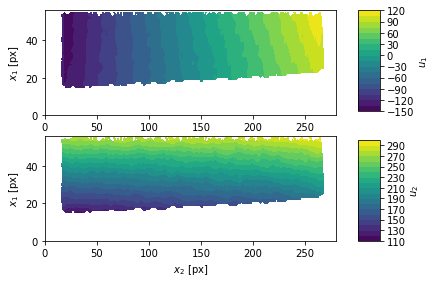

In [ ]:
#Show at near max strain - this is fig 3c
#list(dic_data[dic_data['complete_data']['u_total'][201][0]])

disp_field_data_plateau = dic_data[dic_data['complete_data']['u_total'][201][0]]

u1_field_data_plateau = disp_field_data_plateau[0,0]
u2_field_data_plateau = disp_field_data_plateau[1,0]

#show both images

ax1 = plt.subplot(211)
#use rot90 since the matlab data is on an ndgrid-type mesh and plt assume mgrid format
plt.contourf(np.rot90(dic_data[u1_field_data_plateau]),levels=20)
plt.ylabel('$x_1$ [px]')
cax = plt.axes([0.85, 0.55, 0.05, 0.35])
plt.colorbar(cax=cax,label='$u_1$')

ax2 = plt.subplot(212)
plt.contourf(np.rot90(dic_data[u2_field_data_plateau]),levels=20)
plt.ylabel('$x_1$ [px]')
plt.xlabel('$x_2$ [px]')
cax = plt.axes([0.85, 0.1, 0.05, 0.35])
plt.colorbar(cax=cax,label='$u_2$')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

plt.show()
